In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga y descripción general de los datos

In [2]:
houses = pd.read_csv('Casas_venezuela.csv')
apartments = pd.read_csv('Departamentos_venezuela.csv')

In [3]:
houses.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Precio,Área Privada,Terreno,Dormitorios,Total Baños,Baños Completos,Puestos De Estacionamiento,Medios Baños
count,4316.000,4316.000,4316.000,4316.000,4316.000,4316.000,3778.000,4316.000
mean,188918.412,1358.130,982.408,4.344,4.126,3.664,4.312,0.456
std,347001.081,20642.779,15135.698,1.942,2.193,1.919,3.966,0.798
min,250.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,30000.000,184.000,200.000,3.000,3.000,2.000,2.000,0.000
50%,75000.000,307.000,374.000,4.000,4.000,3.000,3.000,0.000
75%,220000.000,500.000,656.000,5.000,5.000,5.000,5.000,1.000
max,8000000.000,940608.000,940608.000,32.000,32.000,32.000,100.000,11.000


In [4]:
apartments.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,Precio,Área Privada,Dormitorios,Total Baños,Baños Completos,Puestos De Estacionamiento,Medios Baños
count,4319.000,4319.000,4319.000,4319.000,4319.000,4319.000,4319.000
mean,117616.189,246.245,2.803,2.589,2.335,2.505,0.253
std,186361.268,1640.356,1.872,1.250,0.997,47.690,0.518
min,220.000,2.000,0.000,1.000,0.000,0.000,0.000
25%,30000.000,78.000,2.000,2.000,2.000,1.000,0.000
50%,60000.000,108.000,3.000,2.000,2.000,2.000,0.000
75%,129000.000,159.500,3.000,3.000,3.000,2.000,0.000
max,3200000.000,85400.000,87.000,15.000,12.000,3132.000,12.000


En estas tablas resumen se encuentran algunos indicadores estadísticos comunes como la media, la desviación estandard, el mínimo, el primer cuartil, mediana, tercer cuartil y el máximo.

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precio                      4316 non-null   int64  
 1   Codígo RAH                  4316 non-null   object 
 2   Tipo de Propiedad           4316 non-null   object 
 3   Estilo                      4316 non-null   object 
 4   Área Privada                4316 non-null   int64  
 5   Terreno                     4316 non-null   int64  
 6   Estado Del Inmueble         4316 non-null   object 
 7   Dormitorios                 4316 non-null   int64  
 8   Total Baños                 4316 non-null   int64  
 9   Baños Completos             4316 non-null   int64  
 10  Tipo De Estacionamiento     4316 non-null   object 
 11  Amoblado                    4316 non-null   object 
 12  Dormitorio De Servicio      4316 non-null   object 
 13  Calle                       4316 

In [6]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Precio                      4319 non-null   int64  
 1   Codígo RAH                  4319 non-null   object 
 2   Tipo de Propiedad           4319 non-null   object 
 3   Estilo                      4319 non-null   object 
 4   Área Privada                4319 non-null   int64  
 5   Estado Del Inmueble         4319 non-null   object 
 6   Dormitorios                 4319 non-null   int64  
 7   Total Baños                 4319 non-null   int64  
 8   Baños Completos             4319 non-null   int64  
 9   Tipo De Estacionamiento     4319 non-null   object 
 10  Puestos De Estacionamiento  4319 non-null   int64  
 11  Amoblado                    4319 non-null   object 
 12  Dormitorio De Servicio      4319 non-null   object 
 13  Medios Baños                4319 

# Análisis general de los datos numéricos

In [7]:
# Separo las columnas numericas
houses_numeric_features = [col for col in houses.columns if houses[col].dtype != 'object']
apartments_numeric_features = [col for col in apartments.columns if apartments[col].dtype != 'object']

In [8]:
houses_numeric_features

['Precio',
 'Área Privada',
 'Terreno',
 'Dormitorios',
 'Total Baños',
 'Baños Completos',
 'Puestos De Estacionamiento',
 'Medios Baños']

In [9]:
# Grafico para cada columna numerica un histograma y un boxplot
def graph_numeric_features(df, features):
    for col in features:
        fig, ax = plt.subplots(2, 1, figsize=(9,6), height_ratios=[2,1])
        
        # Intento transformar la columa a int, y si no se puede le quito los nan a las columnas float
        try:
            feature = df[col].astype(int)
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
        
        # Histograma
        ax[0].hist(feature, bins=50, edgecolor = "black")
        # Distribucion
        feature.plot(kind='kde', ax=ax[0], secondary_y = True, color='green', linestyle='dashed')
        ax[0].ticklabel_format(style='plain')
        ax[0].axvline(feature.median(), color='red', linestyle='dashed', linewidth=2, label= f'Mediana = {feature.median():.3f}')
        ax[0].axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=2, label= f'Media = {feature.mean():.3f}')
        ax[0].set_ylabel('Cantidad')
        ax[0].legend()
        
        # Boxplot
        ax[1].boxplot(feature, vert = False, medianprops = { 'color':'red' })
        ax[1].get_xaxis().get_major_formatter().set_scientific(False)

        fig.suptitle(col)
    plt.show()

## Casas

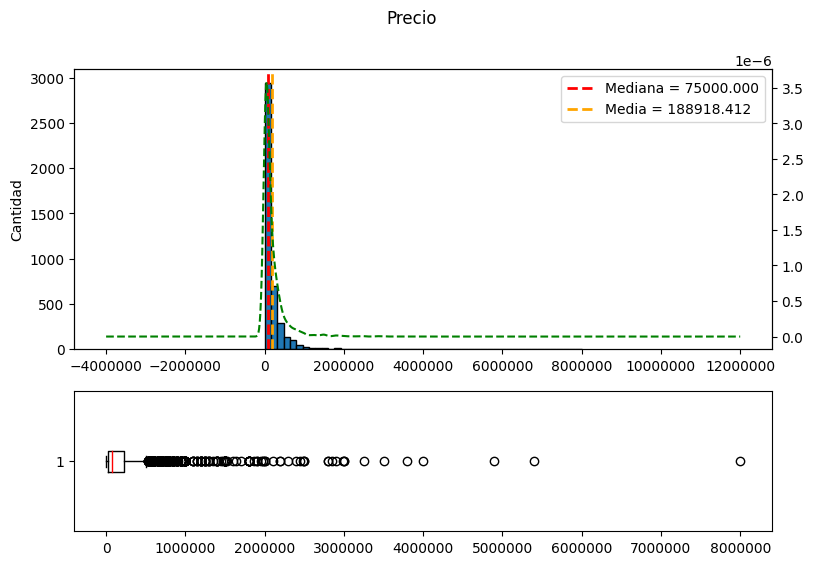

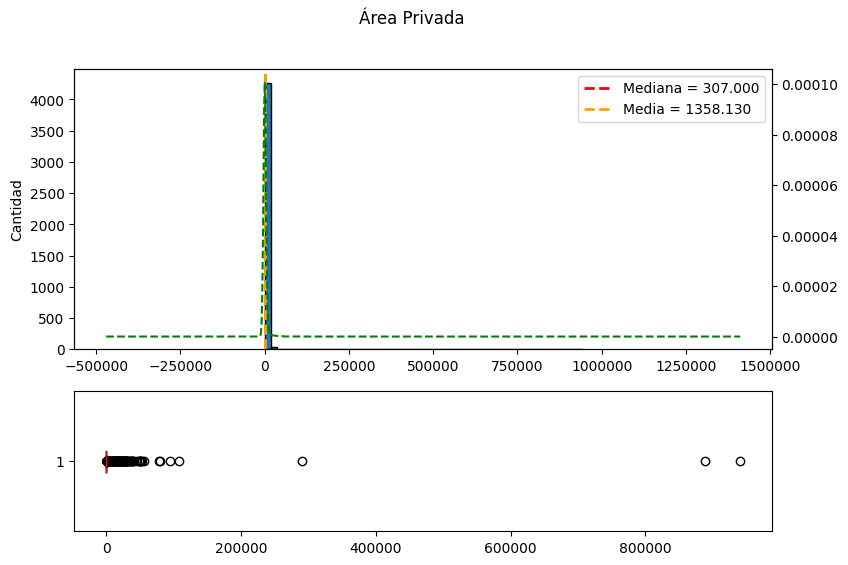

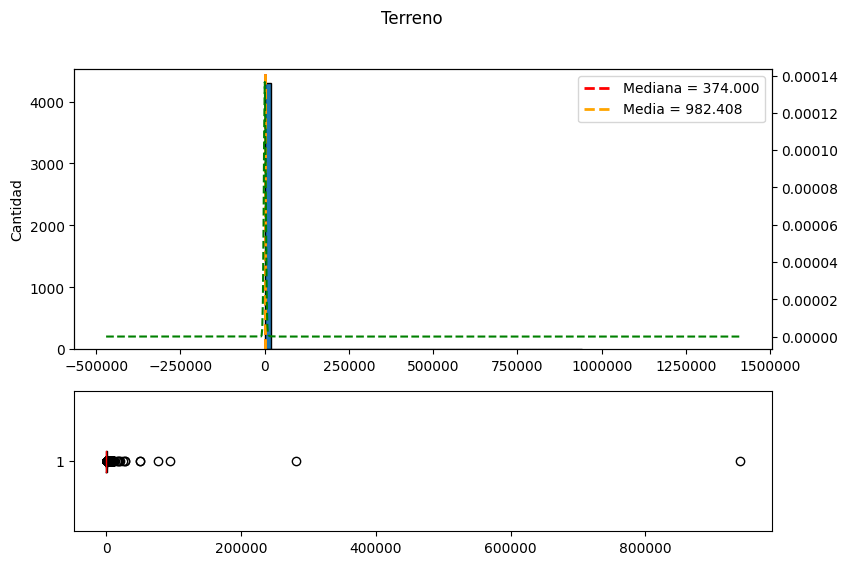

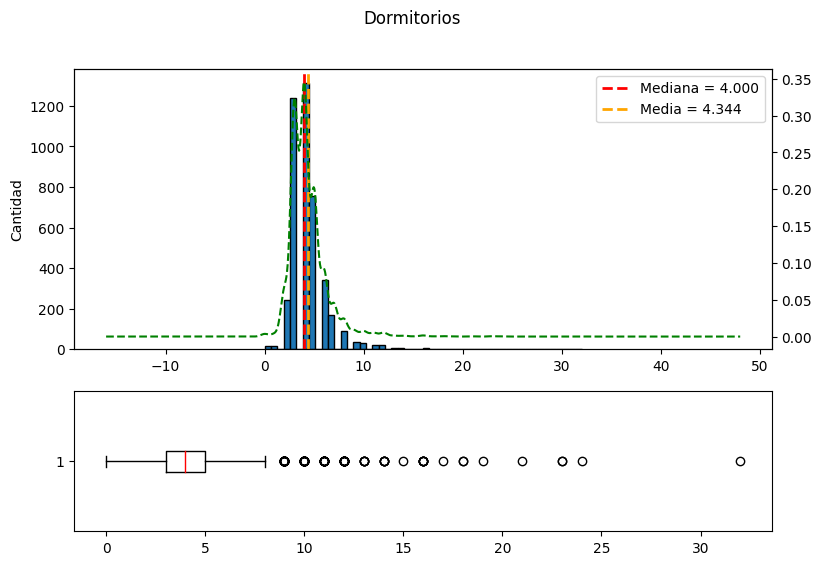

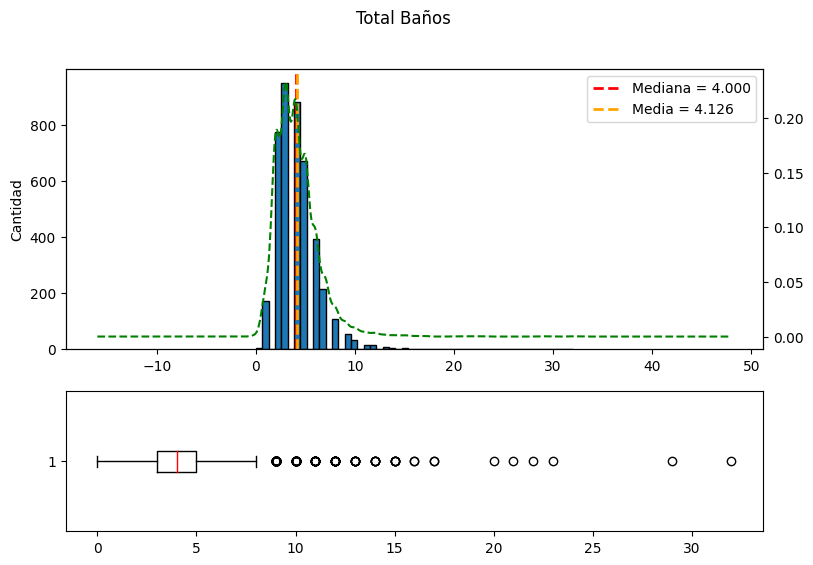

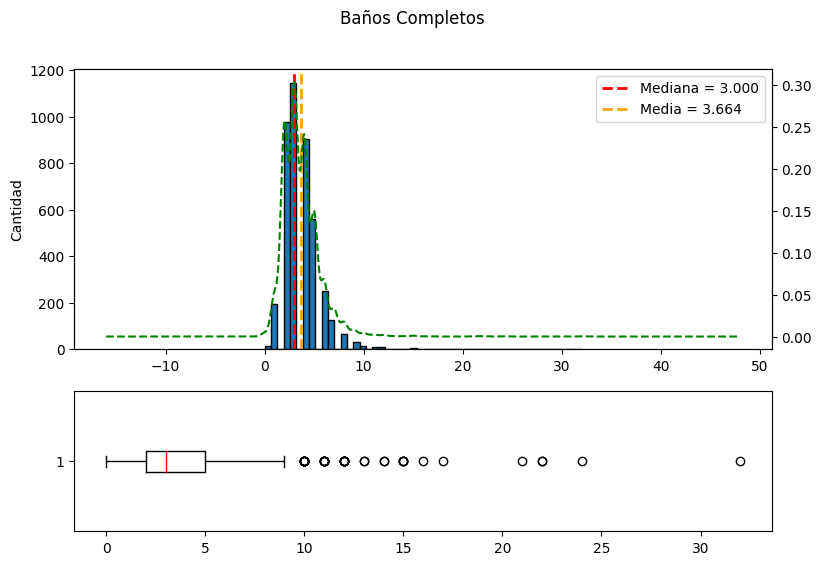

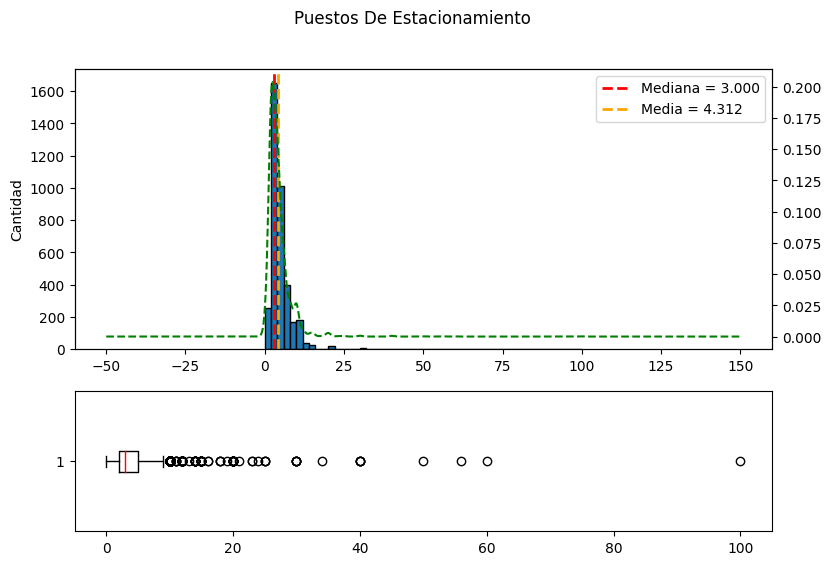

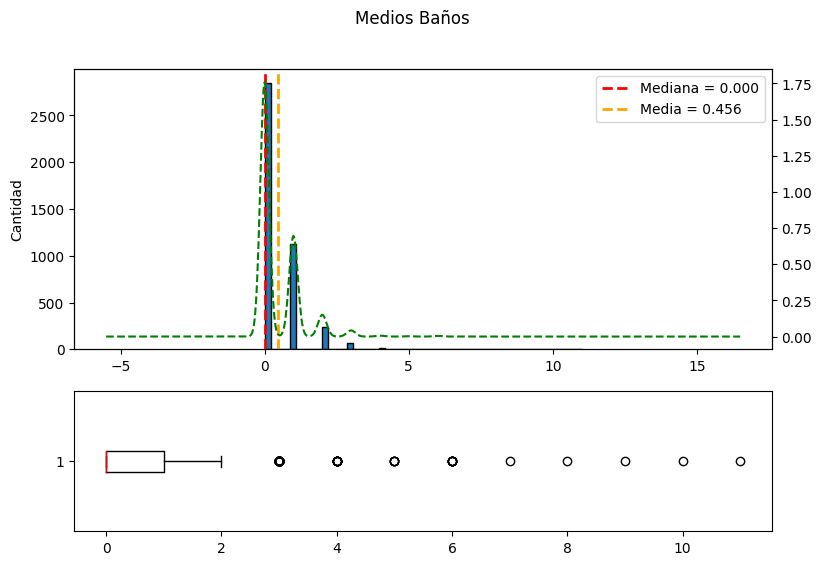

In [10]:
graph_numeric_features(houses, houses_numeric_features)

Podemos notar como los dormitorios, total de baños, cantidad de baños y puestos de estacionamientos tienen una distribución asimétrica con cola a la derecha, lo cual se evidencia no solo gráficamente sino también porque la media está a la derecha de la mediana.  
Sin embargo, el análisis de los valores de precios, terrenos y áreas es inconcluso ya que hay outliers muy grandes, y en particular hay uno que es demasiado grande comparado a los demás, que distorsionan el gráfico.

In [11]:
houses[['Terreno', 'Área Privada']].idxmax()

Terreno         3755
Área Privada    3755
dtype: int64

In [12]:
houses.iloc[3755]

Precio                              48000
Codígo RAH                     VE 23-4226
Tipo de Propiedad                    Casa
Estilo                            1 Nivel
Área Privada                       940608
Terreno                            940608
Estado Del Inmueble                 Usado
Dormitorios                             5
Total Baños                             4
Baños Completos                         3
Tipo De Estacionamiento       Descubierto
Amoblado                               Si
Dormitorio De Servicio                 No
Calle                         Calle Ciega
Puestos De Estacionamiento            3.0
Medios Baños                          1.0
Name: 3755, dtype: object

Este outlier con 940608 m^2 de área me distorsiona muchísimo el análisis, y parece ser un error de tipeo, ya que en la publicación de la casa las fotos no reflejan esta supuesta área tan grande.

In [13]:
# Grafico dejando a los mayores outliers, quedandome con los valores por debajo del cuantil 95% y por encima del 1%
def graph_numeric_without_outliers(df, features):
    for col in features:
        fig, ax = plt.subplots(2, 1, figsize=(9,6), height_ratios=[2,1])

        try:
            feature = df[col].astype(int)
        except pd.errors.IntCastingNaNError:
            feature = df[ df[col].notnull() ][col]
        
        feature = feature[(feature < feature.quantile(q=0.95)) & (feature > feature.quantile(q=0.01))]
        
        ax[0].hist(feature, bins=50, edgecolor = "black")
        feature.plot(kind='kde', ax=ax[0], secondary_y = True, color='green', linestyle='dashed')
        ax[0].ticklabel_format(style='plain')
        ax[0].axvline(feature.median(), color='red', linestyle='dashed', linewidth=2, label= f'Mediana = {feature.median():.3f}')
        ax[0].axvline(feature.mean(), color='orange', linestyle='dashed', linewidth=2, label= f'Media = {feature.mean():.3f}')
        ax[0].set_ylabel('Cantidad')
        ax[0].legend()
        
        ax[1].boxplot(feature, vert = False, medianprops = { 'color':'red' })
        ax[1].get_xaxis().get_major_formatter().set_scientific(False)

        fig.suptitle(col)
    plt.show()

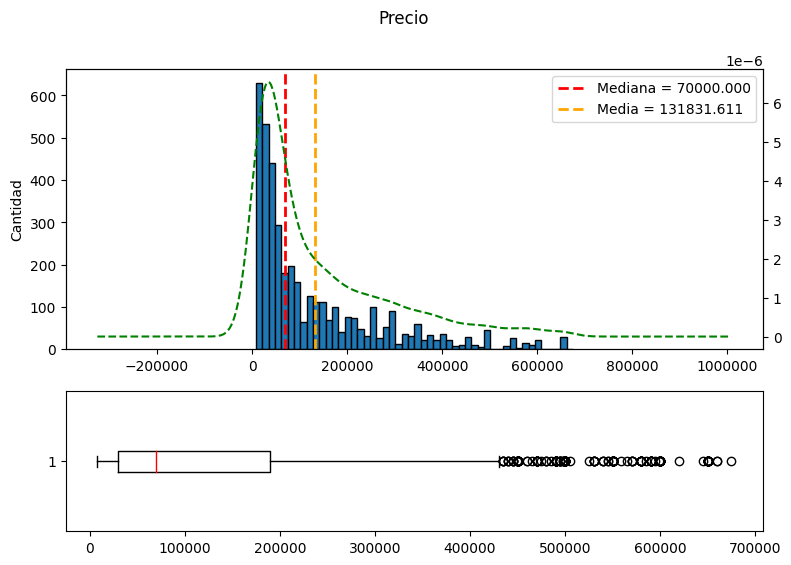

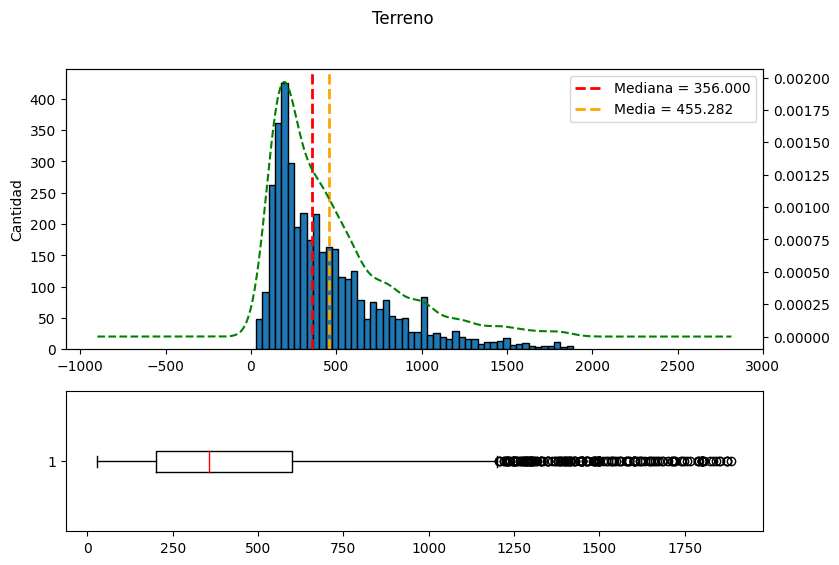

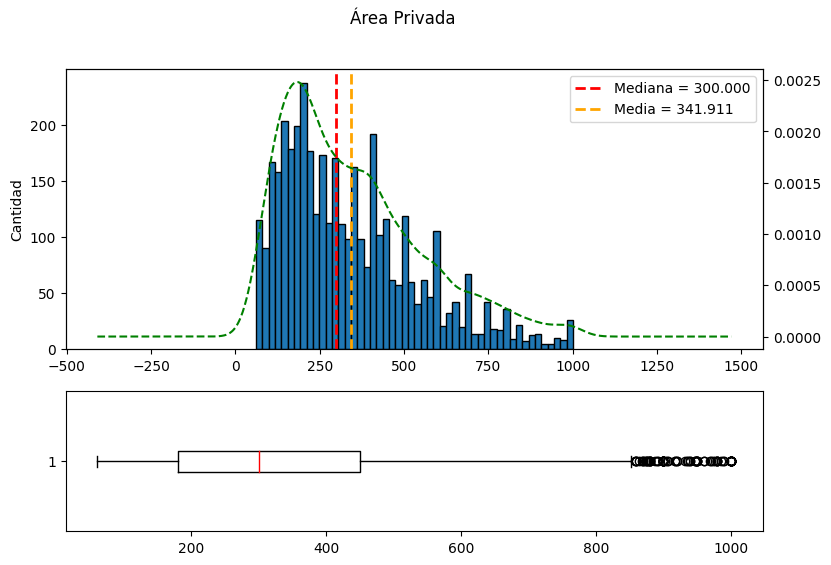

In [14]:
graph_numeric_without_outliers(houses, ['Precio','Terreno', 'Área Privada'])

Ahora sí, sin tantos valores extremos podemos observar la distribución también asimétrica con cola hacia la derecha del precio, área y terreno de las casas.

## Departamentos

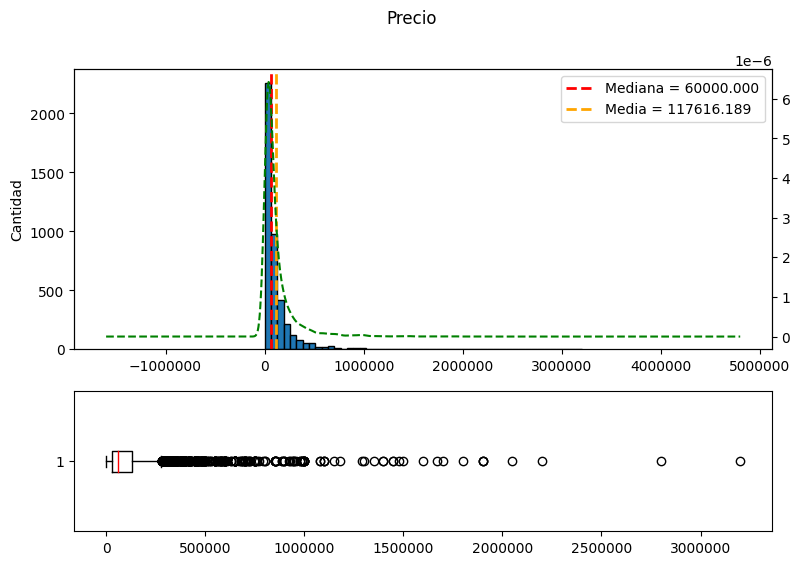

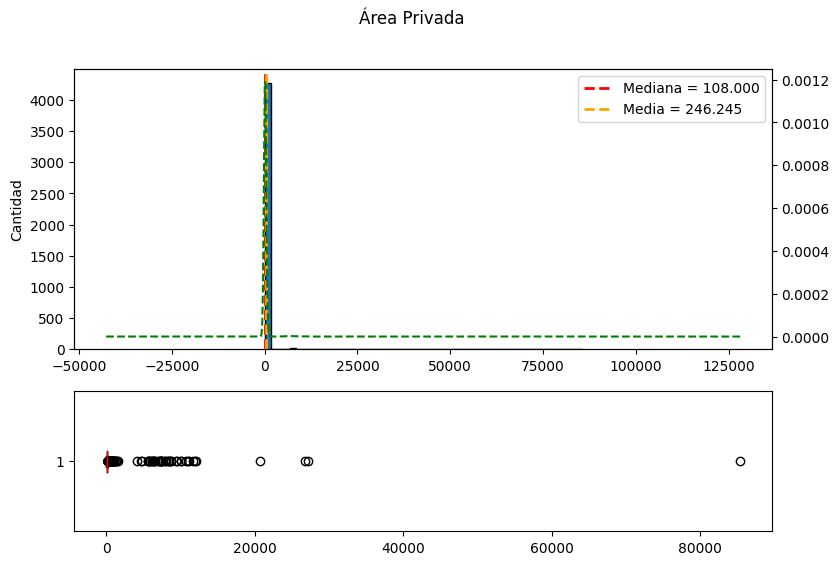

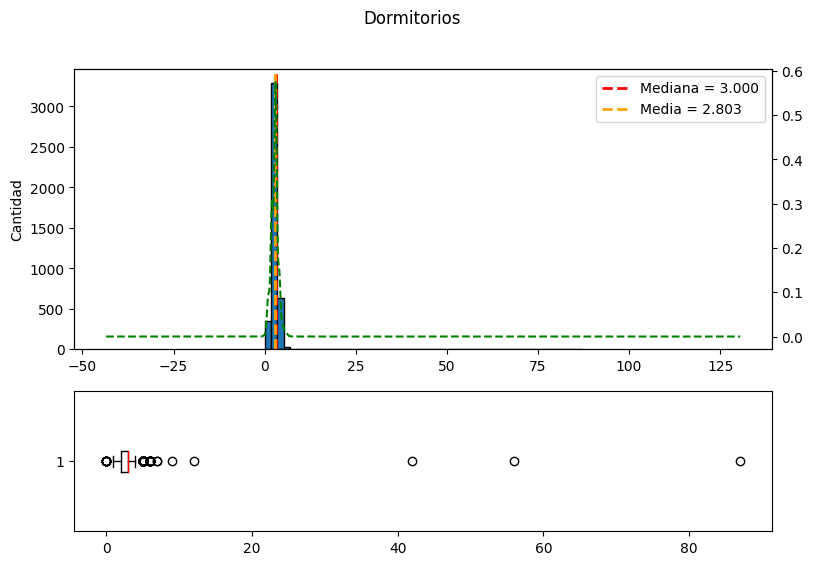

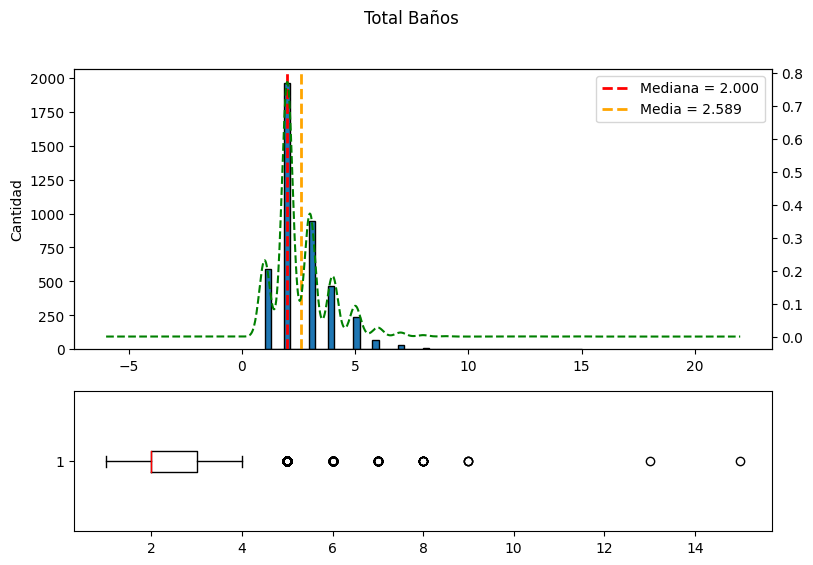

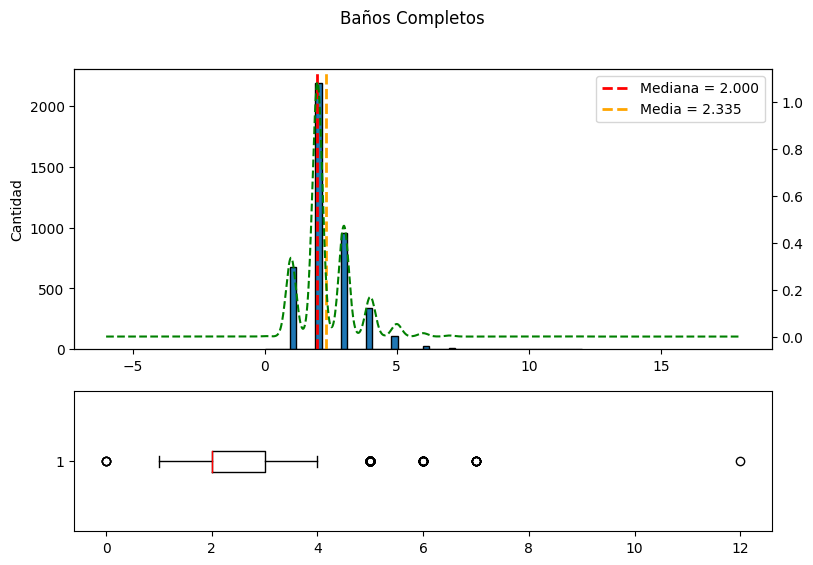

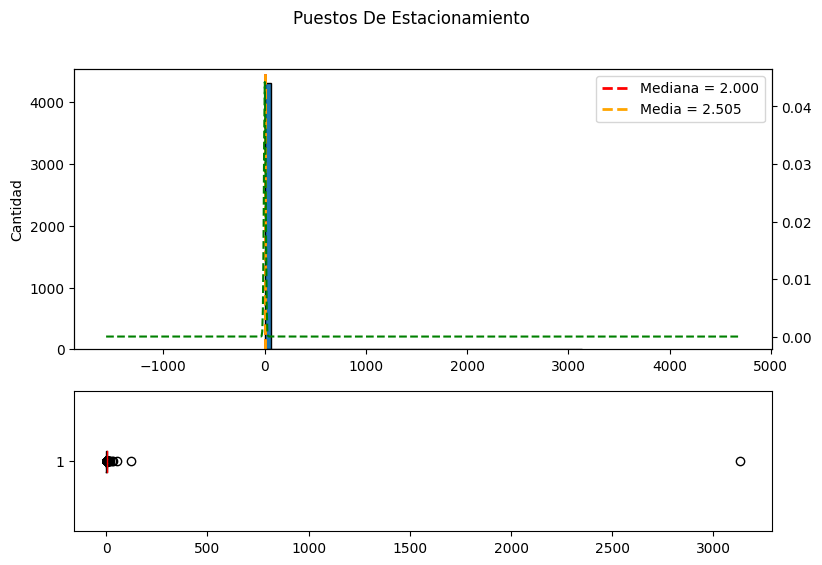

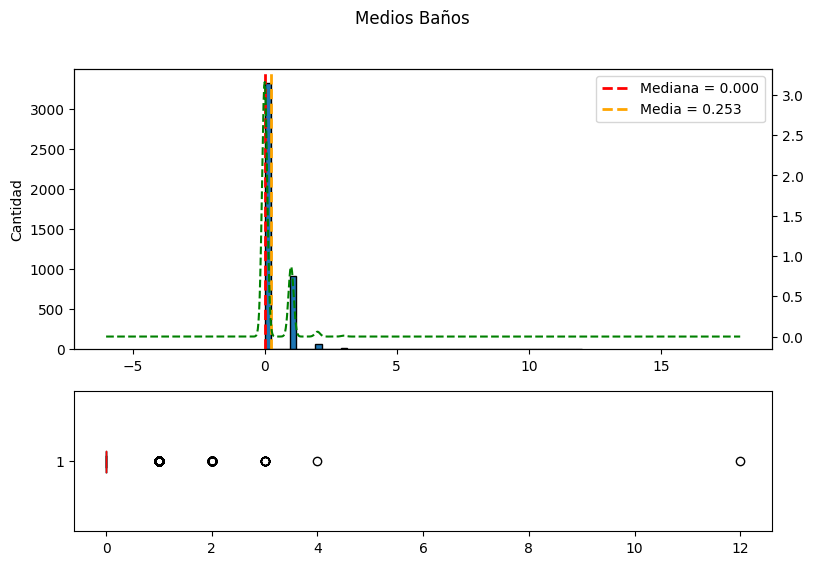

In [15]:
graph_numeric_features(apartments, apartments_numeric_features)

Para los departamentos tenemos una situación parecida con respecto a la presencia de outliers que distorsionan el análisis para el terreno y área, pero en particular para departamentos parece haber a simple vista una menor asimetría en los precios con respecto a las casas.  
También, es de interés la forma del gráfico para los medios baños, lo cual se debe a que no es común que haya medios baños en departamentos.

In [16]:
# Mayor valor positivo del skew -> mayor longitud de la cola derecha (mas asimetrico)
print("Skew para casas: ",houses['Precio'].skew())
print("Skew para departamentos: ", apartments['Precio'].skew())
# Mayor valor de kurtosis -> colas mas gruesas, centro mas "en punta" y menor proporcion de valores intermedios
print(f"Kurtosis para casas: {houses['Precio'].kurt()}")
print(f"Kurtosis para departamentos: {apartments['Precio'].kurt()}")


Skew para casas:  7.365933529008345
Skew para departamentos:  5.637731892273711
Kurtosis para casas: 99.39680299448594
Kurtosis para departamentos: 51.767481959252855


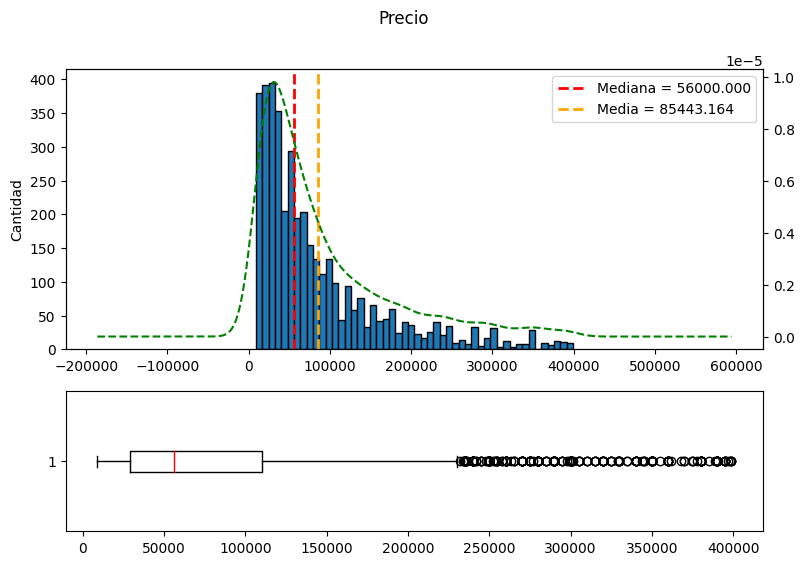

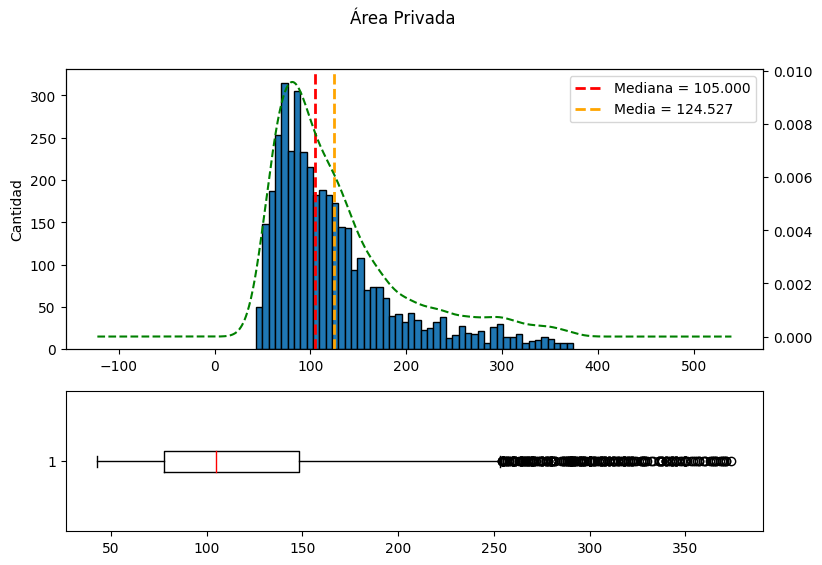

In [17]:
graph_numeric_without_outliers(apartments, ['Precio', 'Área Privada'])

Ahora sin los outliers, se puede ver que se repite el patrón de asimetría con cola hacia la derecha también para los departamentos.

# Análisis de los datos categóricos

In [18]:
# Separo columnas categoricas y recorto algunas otras categorias tambien categoricas
# Recorto pais porque es siempre el mismo, y recorto las demas porque son demasiadas y no son de interes para graficar
houses_categorical_features = [col for col in houses.columns 
                        if (houses[col].dtype == 'object' and col not in ['Codígo RAH', 'Calle', 'País', 'Urbanización', 'Tipo de Propiedad'])]
apartments_categorical_features = [col for col in apartments.columns 
                        if (apartments[col].dtype == 'object' and col not in ['Codígo RAH', 'Calle', 'País', 'Urbanización', 'Tipo de Propiedad'])]

In [19]:
houses_categorical_features

['Estilo',
 'Estado Del Inmueble',
 'Tipo De Estacionamiento',
 'Amoblado',
 'Dormitorio De Servicio']

In [20]:
def graph_categorical_features(df, features):
    for col in features:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()

        counts = df[col].value_counts().sort_index()
        
        colors = [np.random.rand(3,) for i in range(len(counts))]
        
        counts.plot.bar(ax = ax, color=colors,edgecolor='black')
        
        ax.set_title(col)
        ax.set_ylabel('Cantidad')
plt.show()

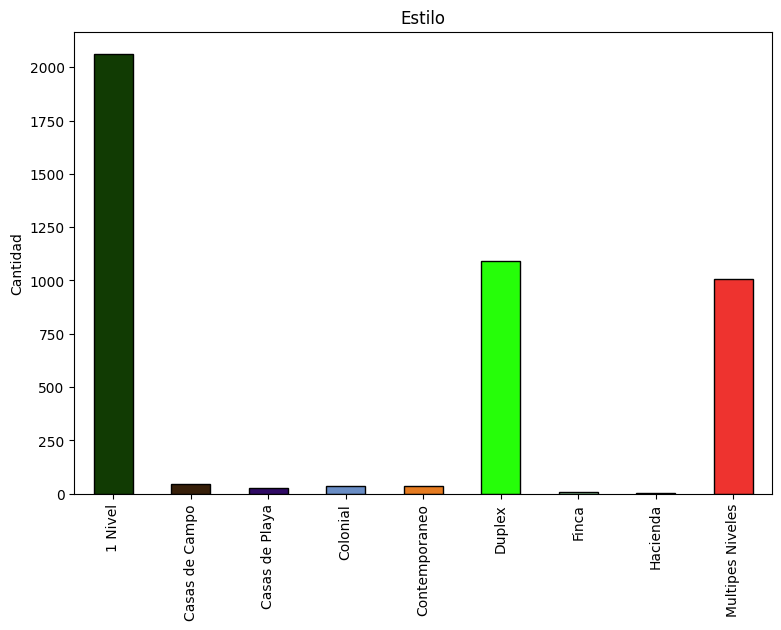

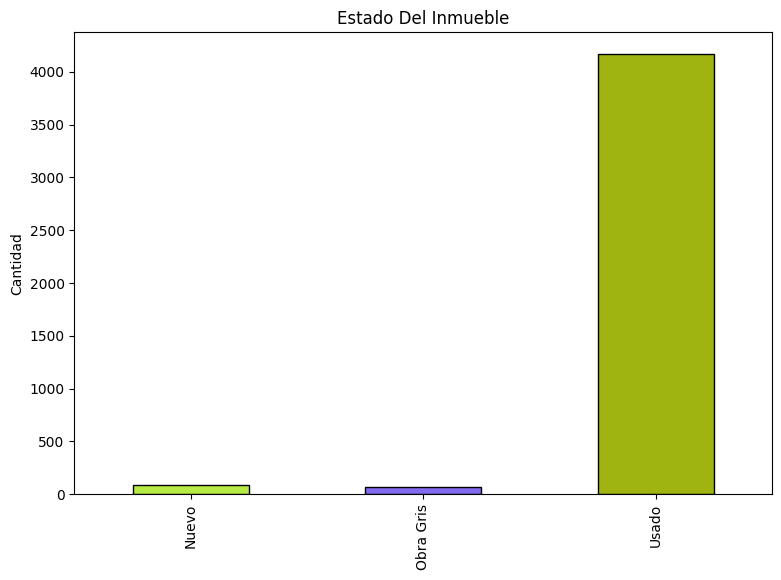

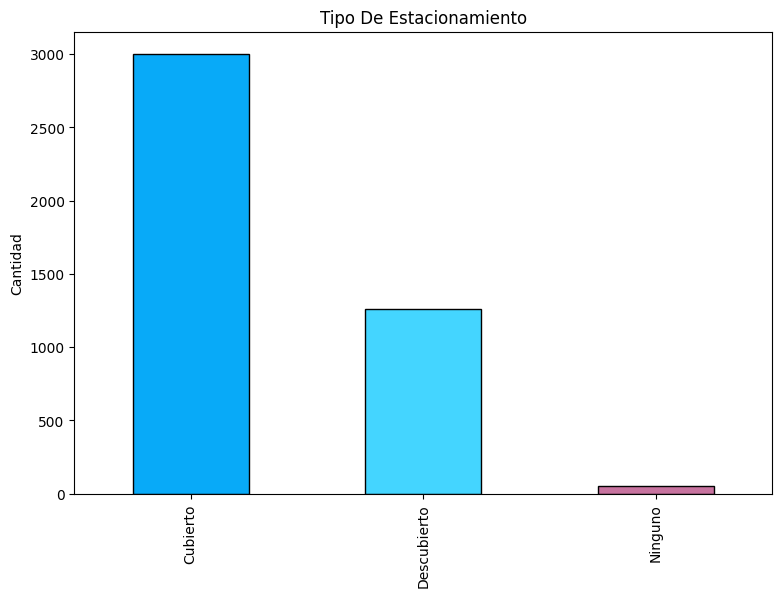

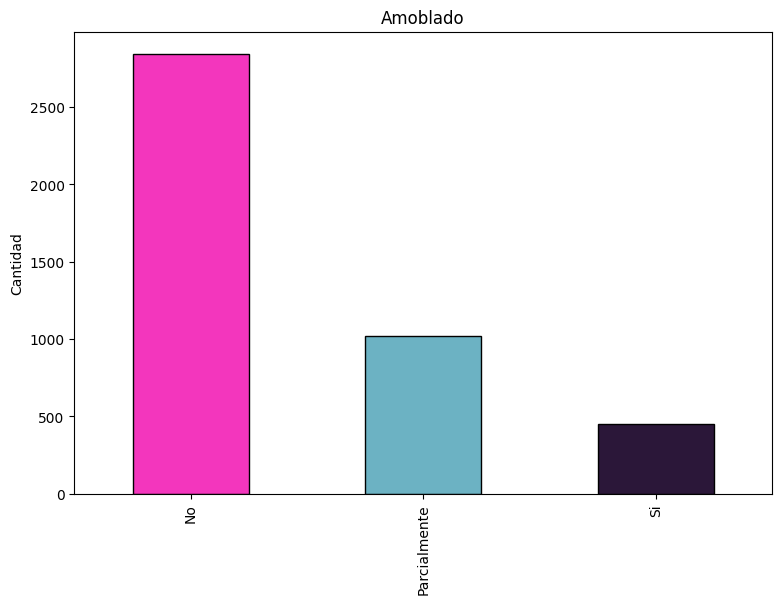

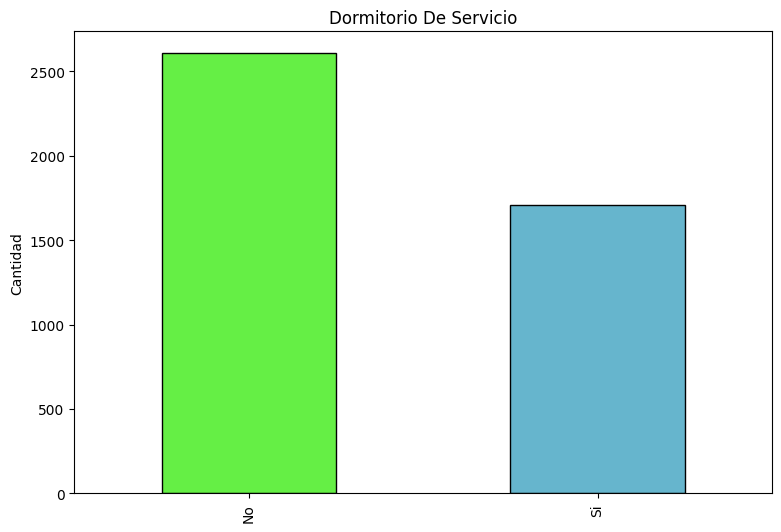

In [21]:
graph_categorical_features(houses, houses_categorical_features)

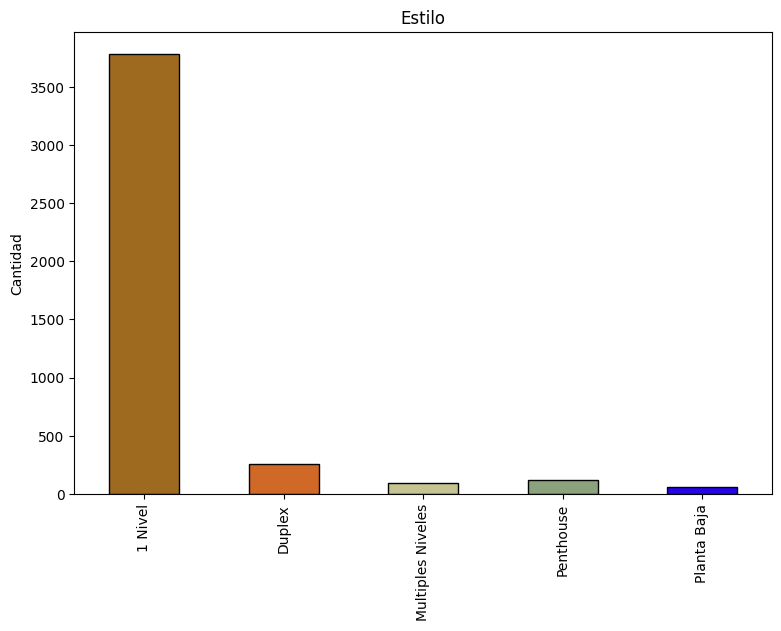

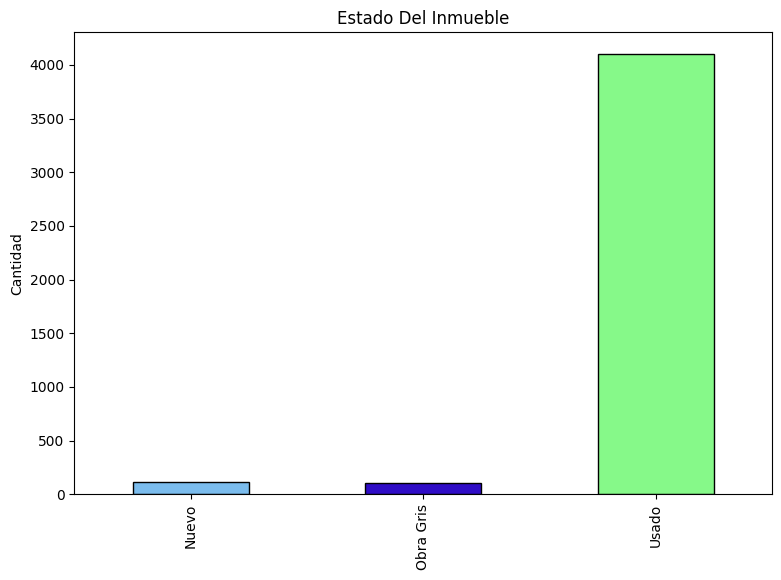

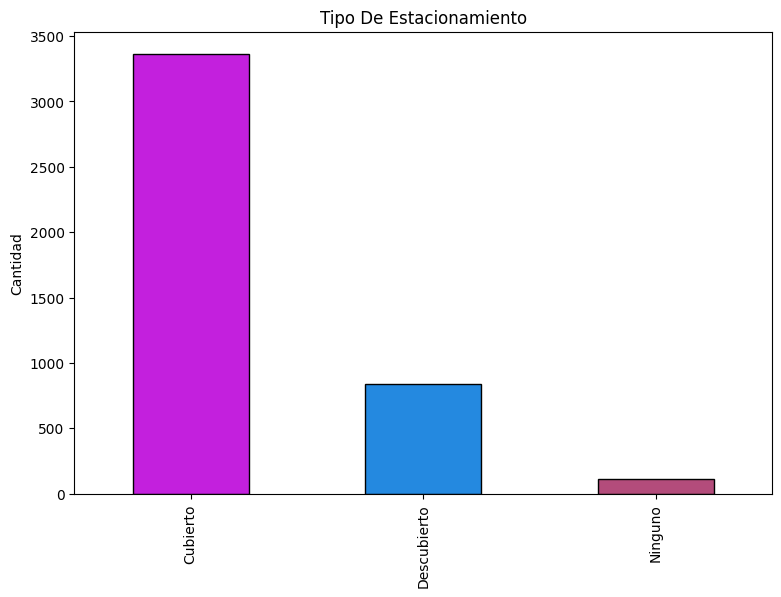

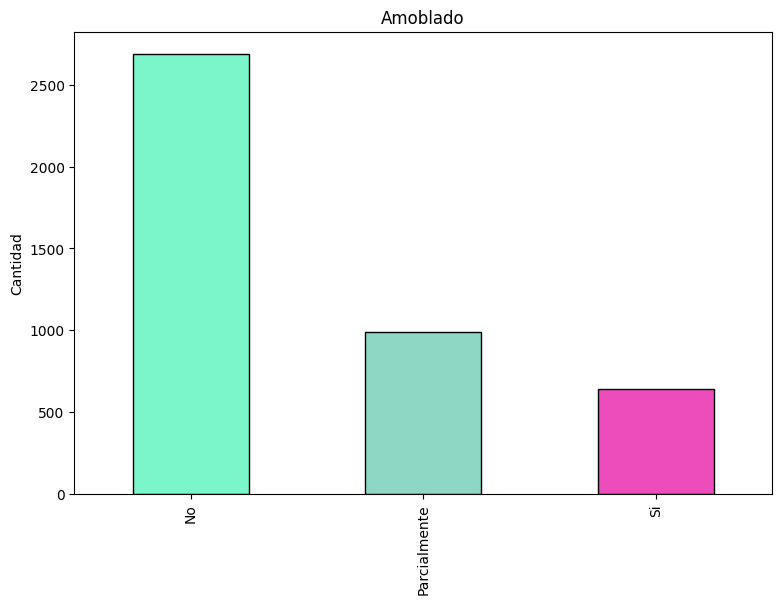

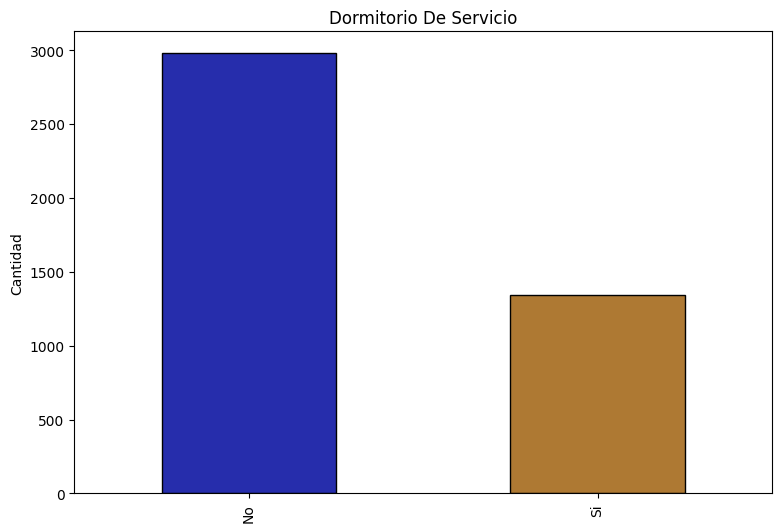

In [22]:
graph_categorical_features(apartments, apartments_categorical_features)

Estos gráficos son autoexplicativos, y representan la distribución de los inmuebles con respecto a sus categorías.

# Relación entre las variables y precios

In [23]:
from scipy.stats import linregress

## Relación entre precio y variables numéricas "continuas"

In [30]:
# Quito los outliers directamente porque se que si los dejo van a afectar demasiado la regresion
def graph_numeric_relations(df, features):
    for col in features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()

        feature = df[col]
        df_filtered_for_outliers = df[(feature < feature.quantile(q=0.95)) & (feature > feature.quantile(q=0.01))]

        try:
            feature = df_filtered_for_outliers[col].astype(int)
            label = df_filtered_for_outliers['Precio']
        except pd.errors.IntCastingNaNError:
            feature = df_filtered_for_outliers[ df_filtered_for_outliers[col].notnull() ][col]
            label = df_filtered_for_outliers[ df_filtered_for_outliers[col].notnull() ]['Precio']

        corr = feature.corr(label)

        plt.scatter(x=feature, y=label)

        lin_reg = linregress(x=feature, y=label)
        line = [ lin_reg.slope * xi + lin_reg.intercept for xi in feature ]
        ax.plot(feature, line, color='red')

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, f'Correlación: {corr:.4f}\n'+r'$R^{2}$'+f': {lin_reg.rvalue**2:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

        ax.set_xlabel(col)
        ax.set_ylabel('Precio')
        ax.ticklabel_format(style='plain')
        ax.set_title(f'Precio en función de {col}')
    plt.show()

### Casas

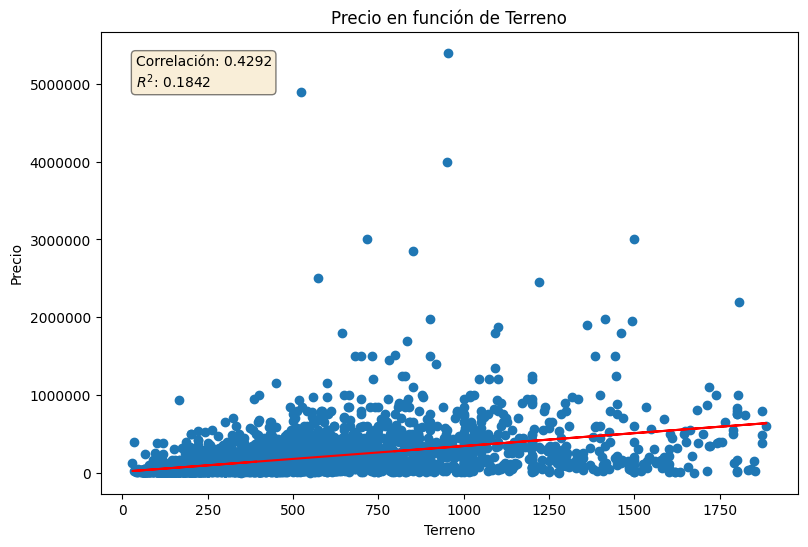

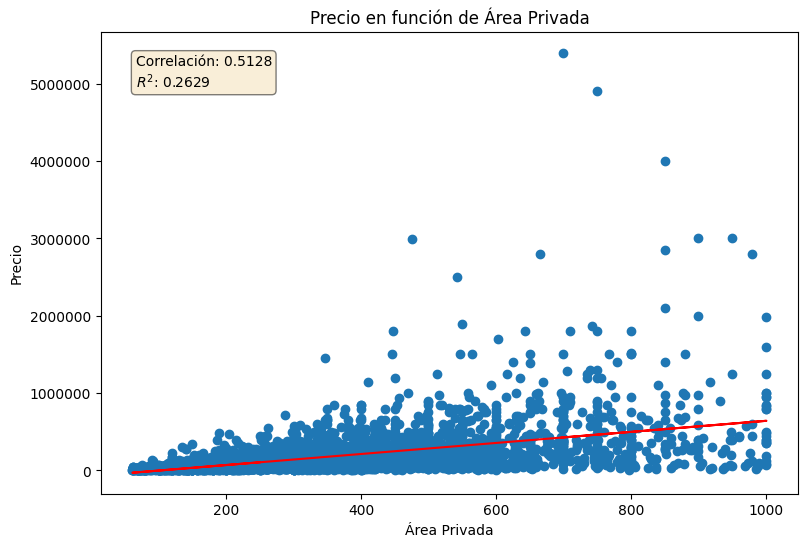

In [31]:
graph_numeric_relations(houses, ['Terreno', 'Área Privada'])

Se puede observar de estos gráficos que a medida que aumenta el área o terreno de la propiedad, el precio tiende a crecer. Indicado tanto gráficamente por la línea de tendencia, como por el valor positivo de la correlación.

### Departamentos

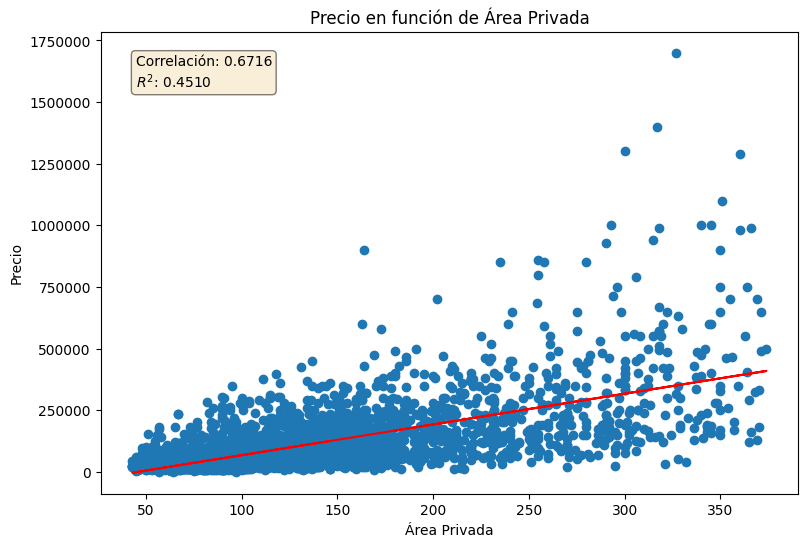

In [32]:
graph_numeric_relations(apartments, ['Área Privada'])

Para los departamentos también se observa el patrón de crecimiento de precios al crecer el área de la propiedad. Sin embargo el ajuste no es muy bueno debido a la gran cantidad de outliers y la distribución no uniforme de los datos.

## Relación entre precios y variables categóricas

In [33]:
def graph_categorical_relations(df, features):
    for col in features:
        fig = plt.figure(figsize=(9,6))
        ax = fig.gca()

        mask_price = (df['Precio'] >= df['Precio'].quantile(q=0.05)) & (df['Precio'] <= df['Precio'].quantile(q=0.95))
        
        if df[col].dtype == 'object':
            df2 = df.loc[ mask_price, ['Precio', col]]
        else:
            mask_col = (df[col] >= df[col].quantile(q=0.01)) & (df[col] <= df[col].quantile(q=0.95))
            df2 = df.loc[mask_col & mask_price, ['Precio', col]]
        
        df2.boxplot(column = 'Precio', by = col, ax=ax)
        ax.set_ylabel('Precio')
        ax.get_yaxis().set_major_formatter(lambda x, pos: f'{x:.0f}')

        if len(ax.get_xticklabels()) > 10 and any([len(str(label.get_text())) >= 5 for label in ax.get_xticklabels()]):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
        elif len(ax.get_xticklabels()) > 5 and any([len(str(label.get_text())) >= 5 for label in ax.get_xticklabels()]):
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

        ax.set_title('Precio en función de ' + col)
    plt.show()

### Casas

In [34]:
houses.columns

Index(['Precio', 'Codígo RAH', 'Tipo de Propiedad', 'Estilo', 'Área Privada',
       'Terreno', 'Estado Del Inmueble', 'Dormitorios', 'Total Baños',
       'Baños Completos', 'Tipo De Estacionamiento', 'Amoblado',
       'Dormitorio De Servicio', 'Calle', 'Puestos De Estacionamiento',
       'Medios Baños'],
      dtype='object')

In [35]:
houses_cat_features = [col for col in houses.columns 
                      if col not in ['Precio', 'Área Privada', 'Terreno', 'Codígo RAH', 'Calle', 'País', 'Urbanización', 'Tipo de Propiedad'] ]
apartments_cat_features = [col for col in apartments.columns 
                      if col not in ['Precio', 'Área Privada', 'Terreno', 'Codígo RAH', 'Calle', 'País', 'Urbanización', 'Tipo de Propiedad'] ]

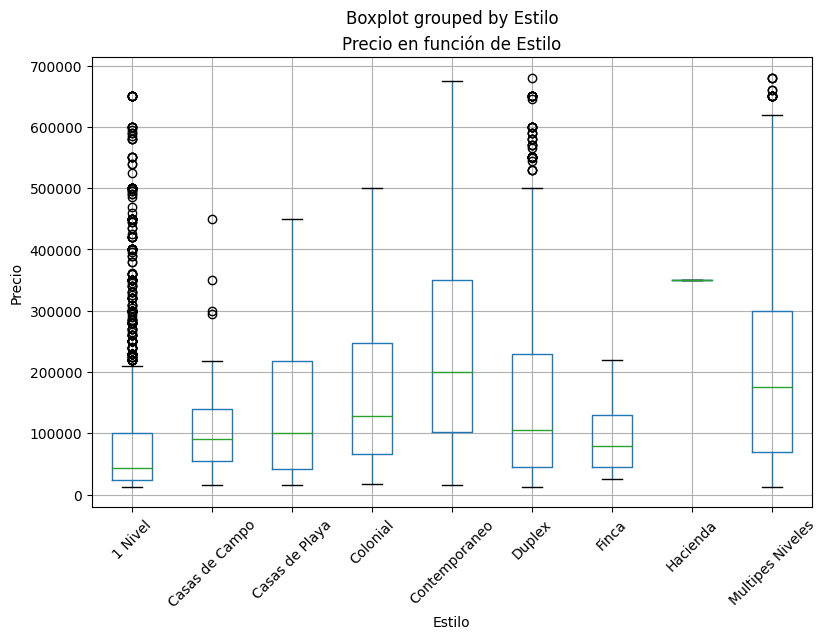

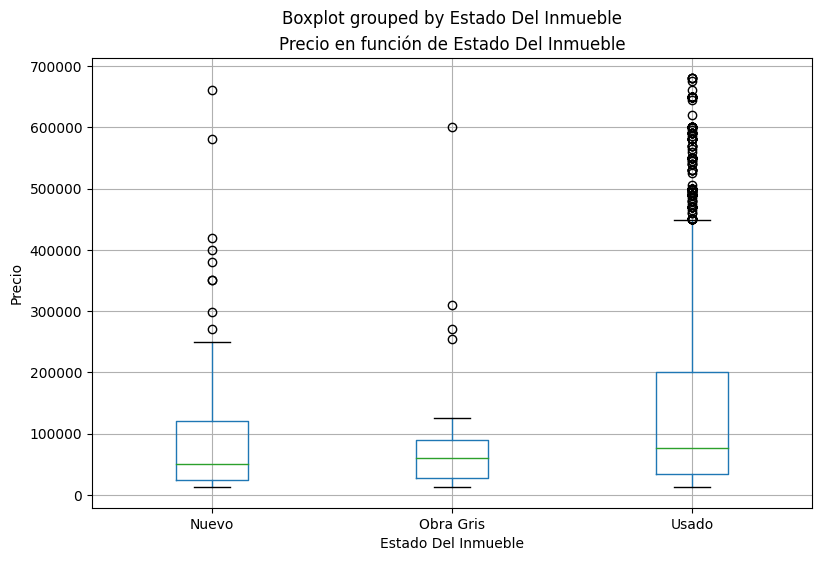

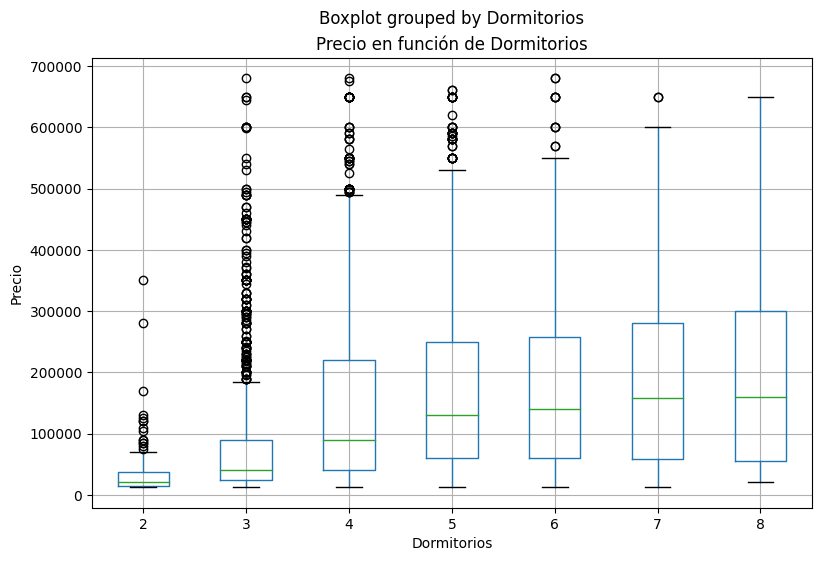

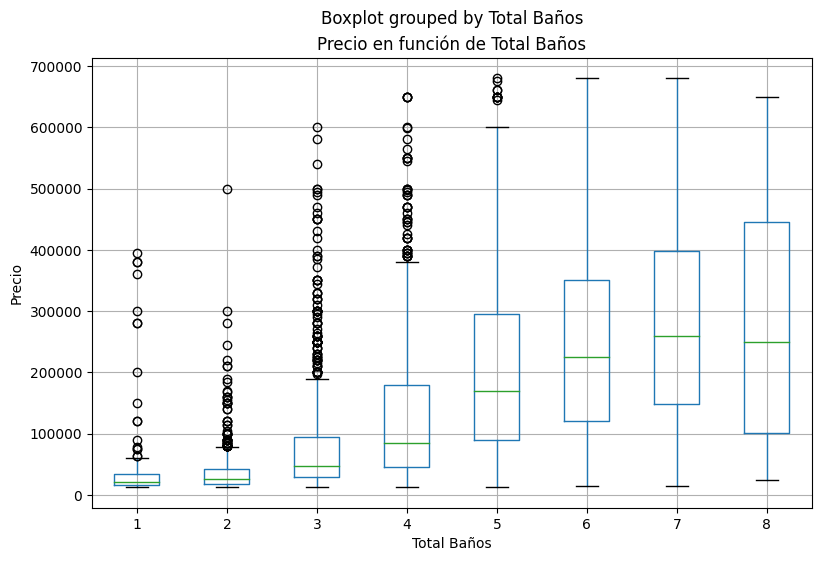

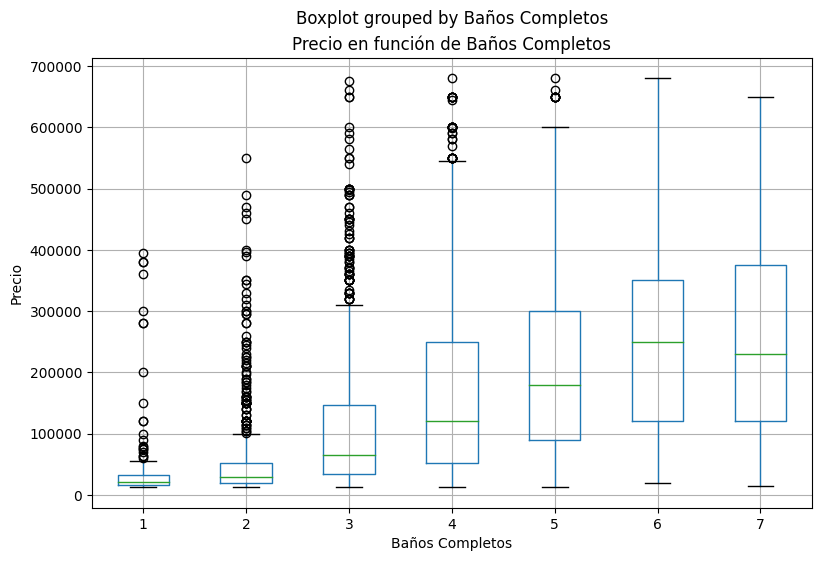

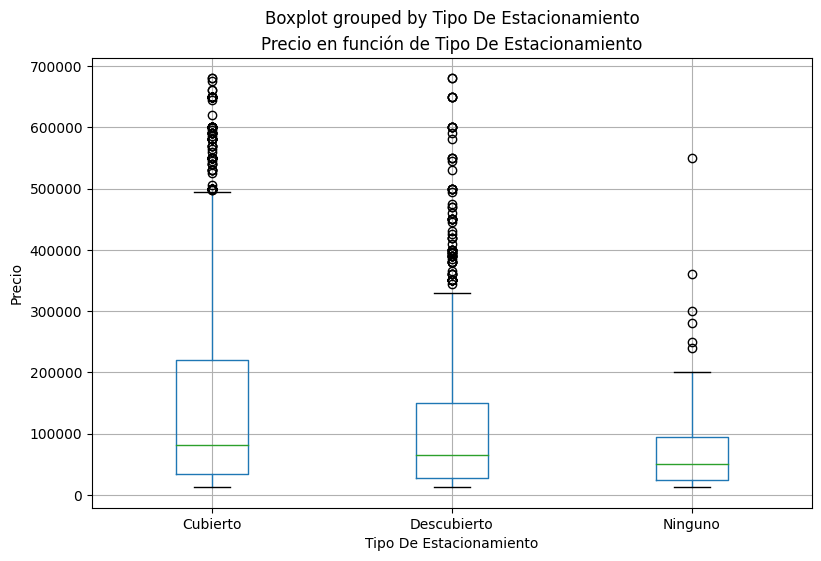

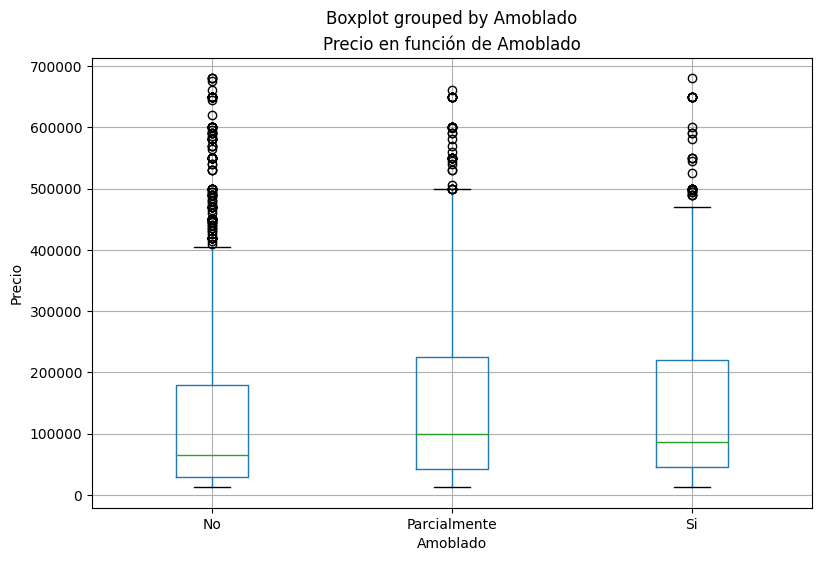

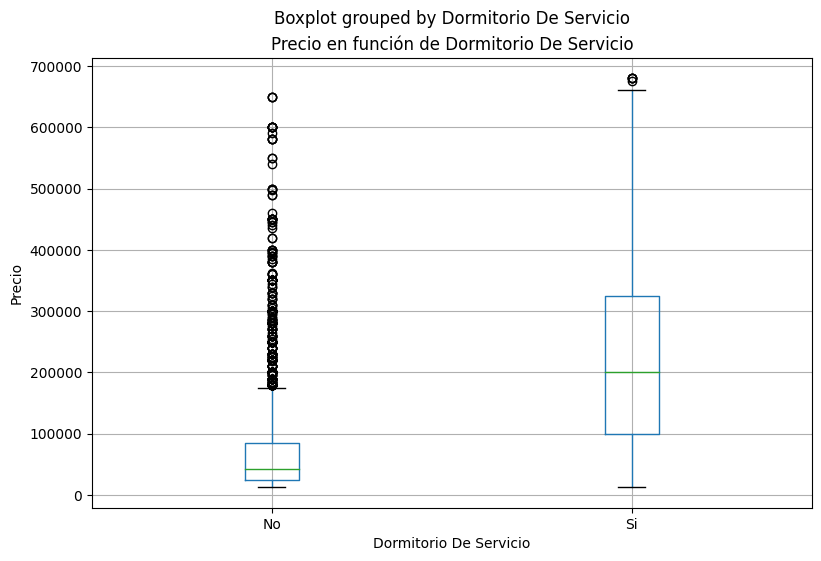

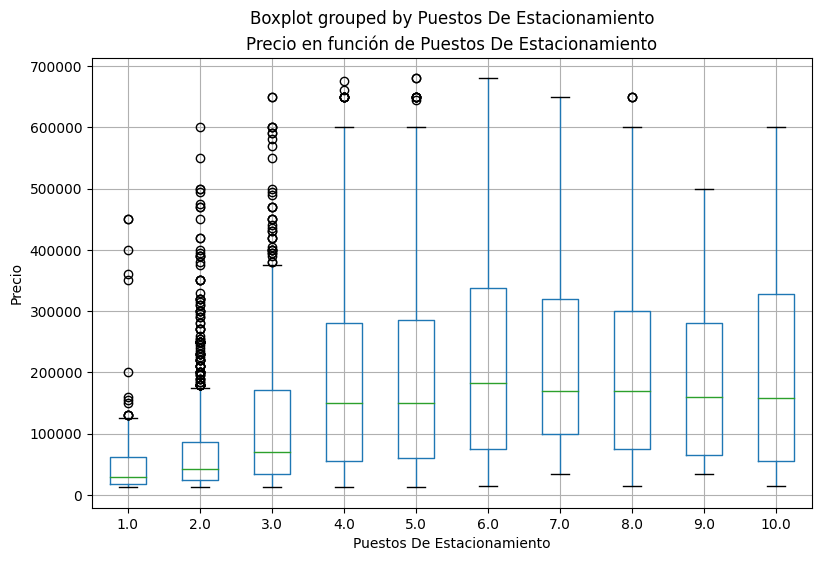

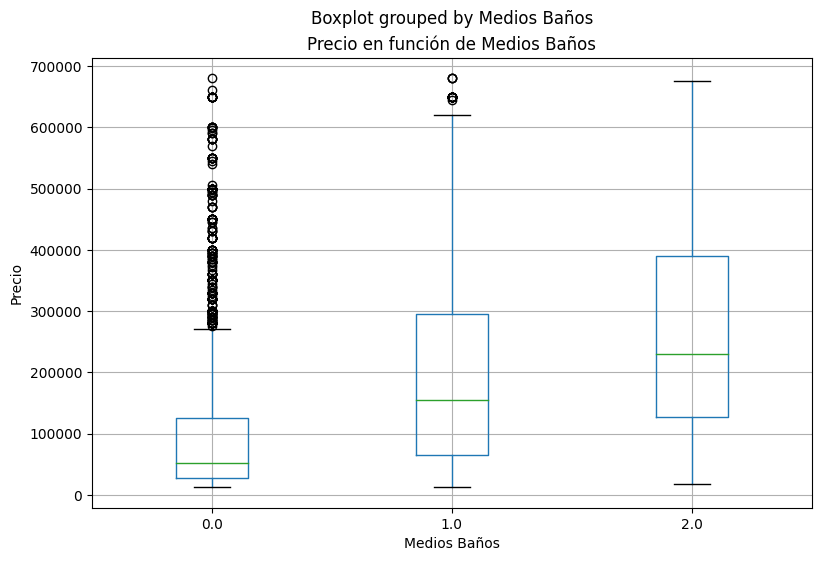

In [36]:
graph_categorical_relations(houses, houses_cat_features)

Si bien se pueden ver el esbozo de algunas relaciones en estos gráficos, no hay que tomarlos como algo concreto ya que se está intentando aislar relaciones entre precio y la variable graficada, lo cual es una simplificación burda de la realidad. Por ejemplo, el precio de una propiedad parece crecer cuando crece el número total de baños, pero esto puede deberse no a que la gente sea fanática de los baños, sino a que una mayor cantidad de baños implica un área más grande (casa más grande).  
Aclarado esto, parece que el estado del inmueble no parece tener mucha incidencia en el precio del inmueble, comparado con otras variables. Que el estado del inmueble no tenga incidencia me parece raro, ya que uno tendería a pensar que un inmueble nuevo tendría mayar valor comparado con uno usado, esto podría deberse a un estancamiento en el mercado inmobiliario de casas o simplemente a un dataset que no esta uniformemente distribuido.
Como era de esperarse, pareciera haber una relación directa entre el precio del inmueble y su locación, tamaño y tipo.

### Departamentos

In [37]:
apartments.columns

Index(['Precio', 'Codígo RAH', 'Tipo de Propiedad', 'Estilo', 'Área Privada',
       'Estado Del Inmueble', 'Dormitorios', 'Total Baños', 'Baños Completos',
       'Tipo De Estacionamiento', 'Puestos De Estacionamiento', 'Amoblado',
       'Dormitorio De Servicio', 'Medios Baños'],
      dtype='object')

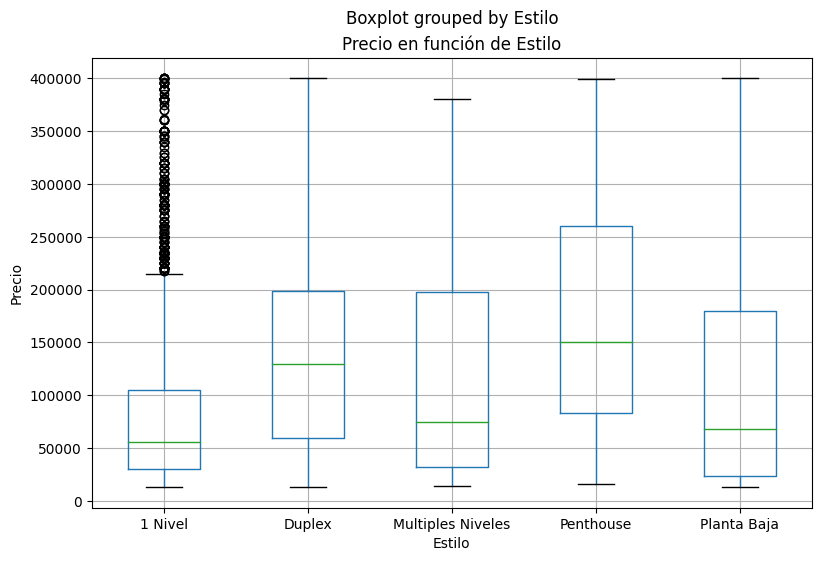

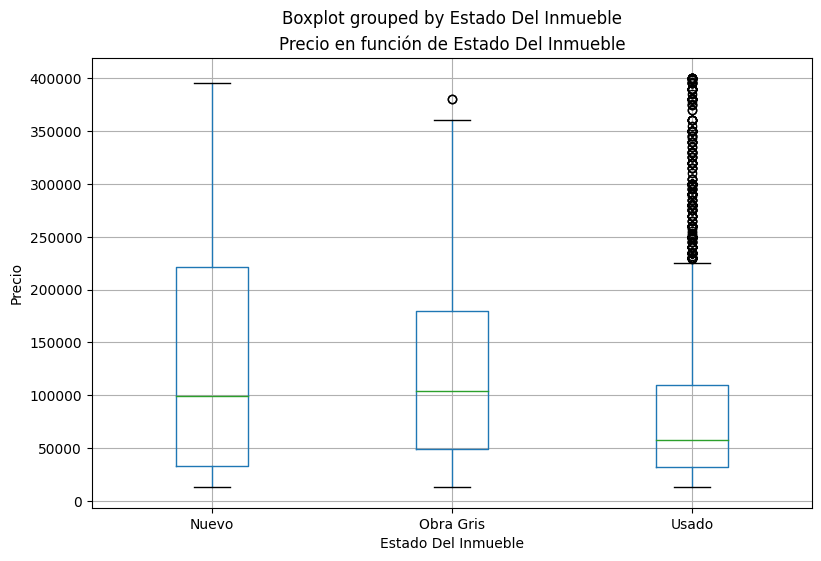

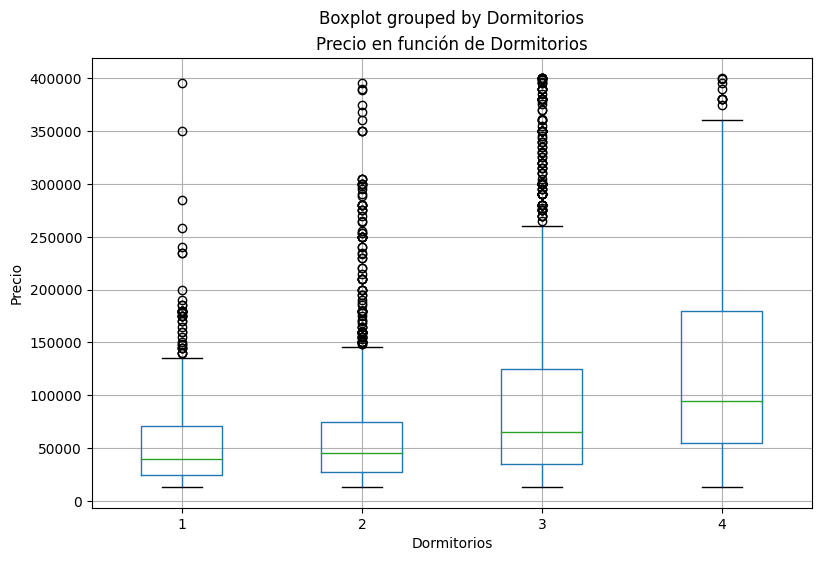

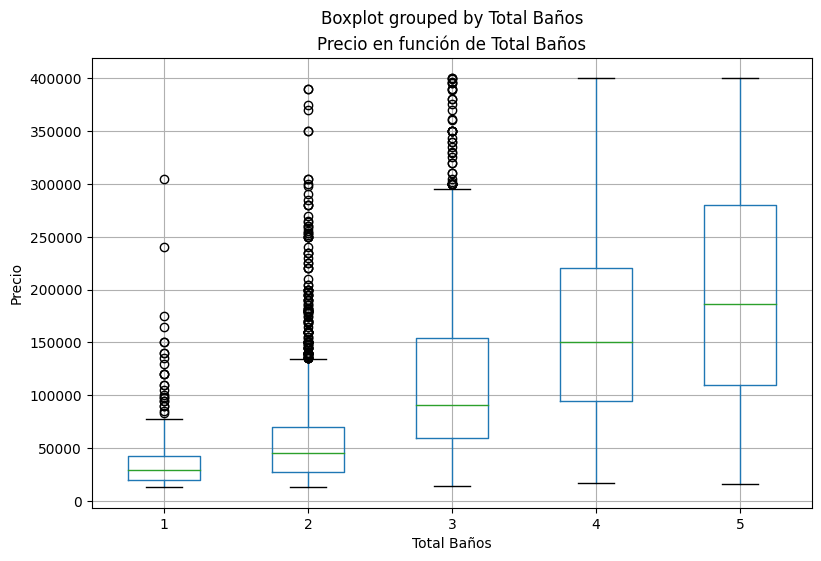

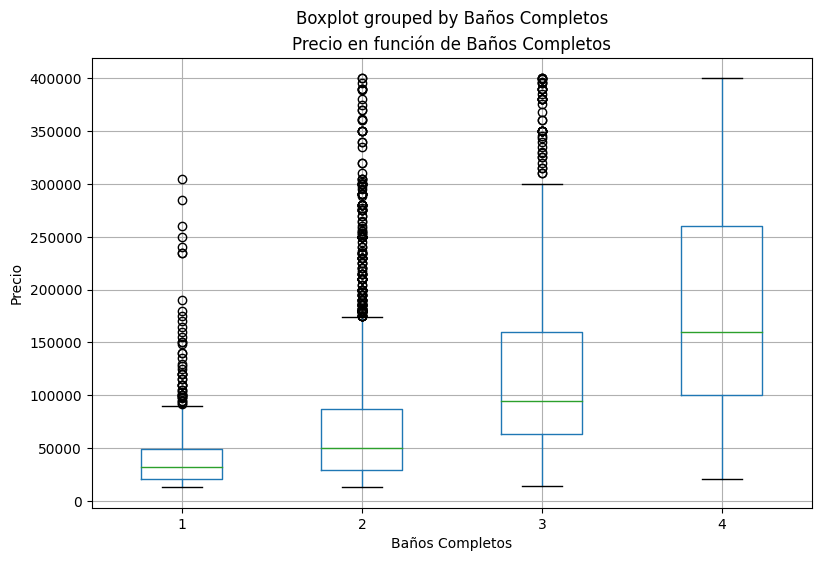

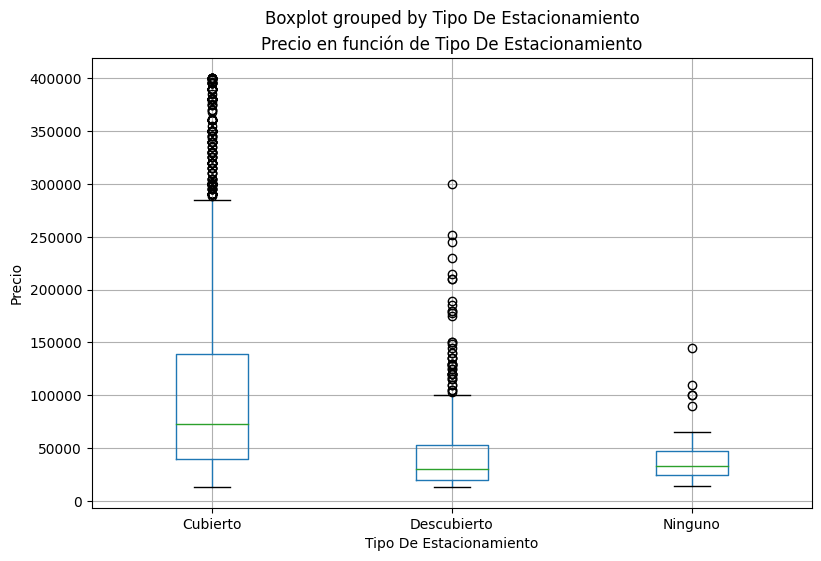

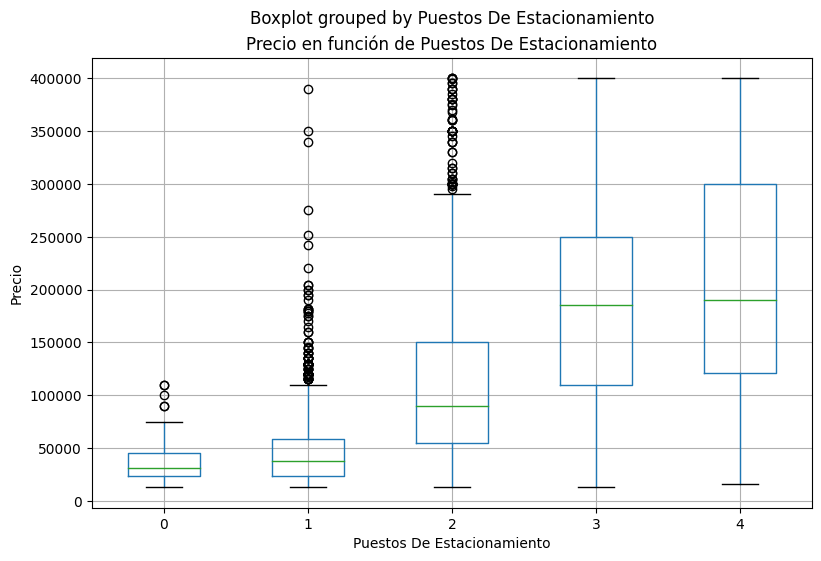

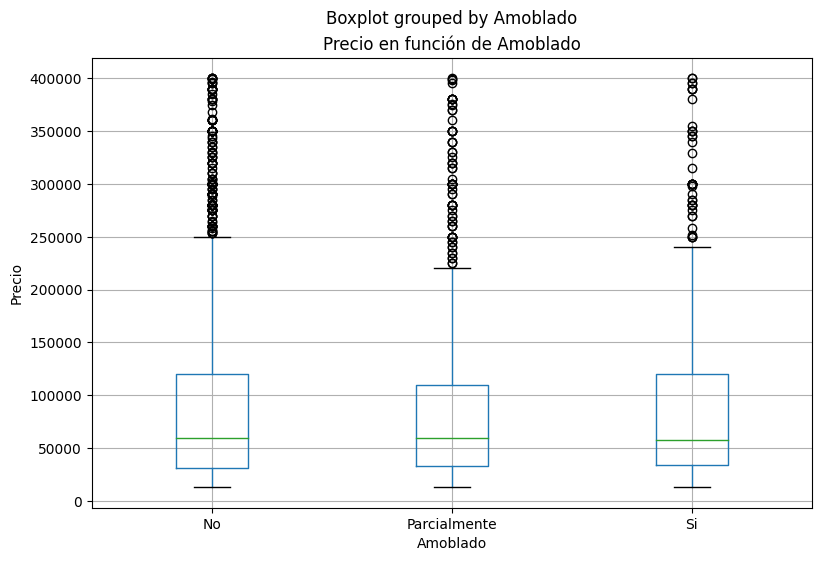

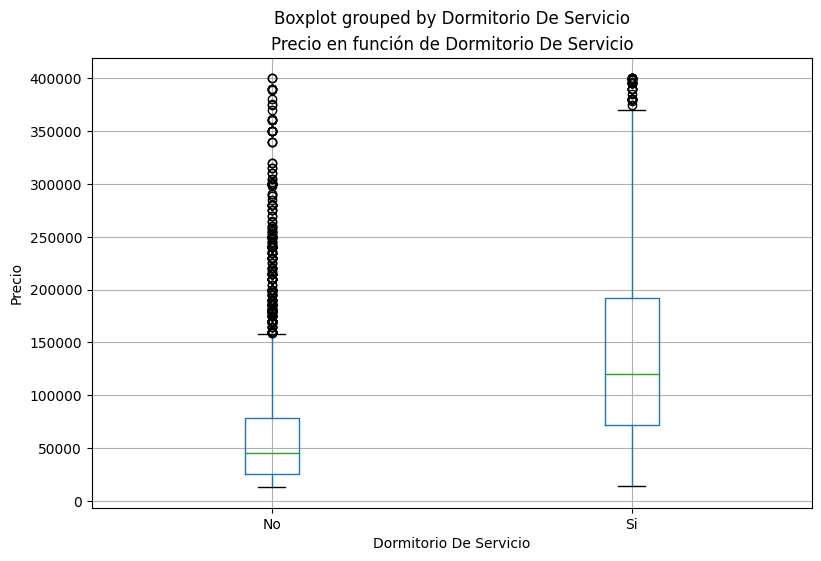

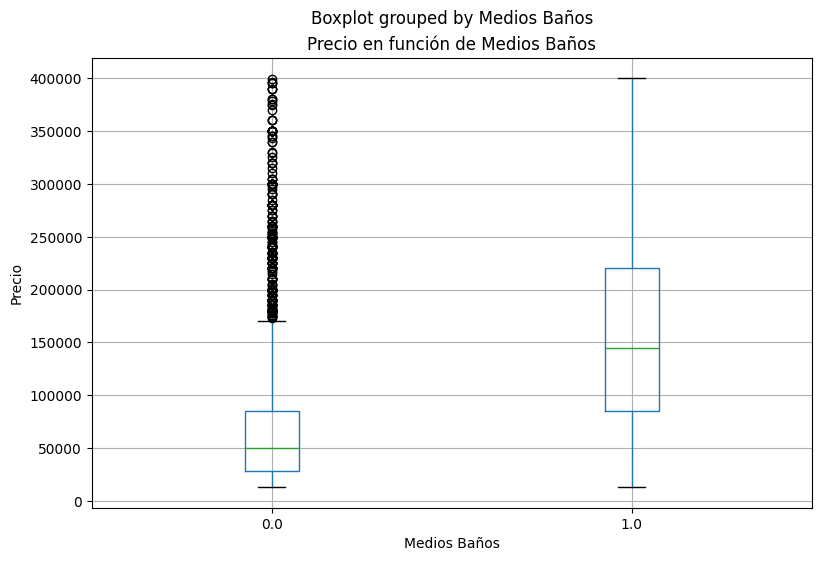

In [38]:
graph_categorical_relations(apartments, apartments_cat_features)

Para los departamentos parece ser una situación análoga a las casas, a excepción que ahora el estado del inmueble tiene mayor efecto en el precio.  

A pesar de haber filtrado gran parte de los outliers usando los cuantiles 95% y 1%, aún persisten muchos que distorsionan la escala de los gráficos.  